# Requirement gathering



In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
!wget --header="Host: storage.googleapis.com" --header="User-Agent: Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/98.0.4758.102 Safari/537.36" --header="Accept: text/html,application/xhtml+xml,application/xml;q=0.9,image/avif,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9" --header="Accept-Language: en-IN,en;q=0.9,en-GB;q=0.8,en-US;q=0.7,hi;q=0.6,mr;q=0.5" --header="Referer: https://www.kaggle.com/" "https://storage.googleapis.com/kaggle-competitions-data/kaggle-v2/8587/868304/bundle/archive.zip?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1645553228&Signature=i13kABmhOt19aL2FrDI%2FwL%2BkHWSneIK1xI6X5lFtXbMM58ML6b5ZVTNRJj%2FwRHx2SPg4lPGNYB9HroQn%2FGMS8%2FP6H%2B6smau%2BFNaoHFcOf%2BDOR4zh0%2F1My0C84XxO9z24xtb56UtruRBPxQZrHfjsjVn7TE2naIbQ2d6JHb1wjH4WDRsvv7DkHmtMo%2BhPoM2ndJUw55ipViVXn2t9qTL5dVEbZhhommVqKzAk9HnpGlVuwHkGCVIED5vT3lFg6xZvEheyL1I821yZrwJ60qmMe6UMR468lm2uuh43mFpOn%2FyA8Ti34mR2%2FqXV9bByhJN%2FvD3GzQuWV2gQ70VET%2FiP9Q%3D%3D&response-content-disposition=attachment%3B+filename%3Dcompetitive-data-science-predict-future-sales.zip" -c -O 'competitive-data-science-predict-future-sales.zip'

--2022-02-20 17:17:55--  https://storage.googleapis.com/kaggle-competitions-data/kaggle-v2/8587/868304/bundle/archive.zip?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1645553228&Signature=i13kABmhOt19aL2FrDI%2FwL%2BkHWSneIK1xI6X5lFtXbMM58ML6b5ZVTNRJj%2FwRHx2SPg4lPGNYB9HroQn%2FGMS8%2FP6H%2B6smau%2BFNaoHFcOf%2BDOR4zh0%2F1My0C84XxO9z24xtb56UtruRBPxQZrHfjsjVn7TE2naIbQ2d6JHb1wjH4WDRsvv7DkHmtMo%2BhPoM2ndJUw55ipViVXn2t9qTL5dVEbZhhommVqKzAk9HnpGlVuwHkGCVIED5vT3lFg6xZvEheyL1I821yZrwJ60qmMe6UMR468lm2uuh43mFpOn%2FyA8Ti34mR2%2FqXV9bByhJN%2FvD3GzQuWV2gQ70VET%2FiP9Q%3D%3D&response-content-disposition=attachment%3B+filename%3Dcompetitive-data-science-predict-future-sales.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 108.177.125.128, 142.250.157.128, 142.251.8.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|108.177.125.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 15845085 (15M) [application/zip]
Saving 

In [4]:
!unzip 'competitive-data-science-predict-future-sales.zip'

Archive:  competitive-data-science-predict-future-sales.zip
  inflating: item_categories.csv     
  inflating: items.csv               
  inflating: sales_train.csv         
  inflating: sample_submission.csv   
  inflating: shops.csv               
  inflating: test.csv                


# EDA

In [5]:
df_train = pd.read_csv("sales_train.csv") 
df_items = pd.read_csv("items.csv")
df_item_cat = pd.read_csv("item_categories.csv")
df_shops = pd.read_csv("shops.csv")
df_test = pd.read_csv("test.csv")

In [7]:
df_train.shape #shape of data

(2935849, 6)

In [6]:
df_train.head() #reading top 5 rows

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.00,1.0
1,03.01.2013,0,25,2552,899.00,1.0
2,05.01.2013,0,25,2552,899.00,-1.0
3,06.01.2013,0,25,2554,1709.05,1.0
4,15.01.2013,0,25,2555,1099.00,1.0


In [8]:
df_train.info() #Data types and other info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2935849 entries, 0 to 2935848
Data columns (total 6 columns):
 #   Column          Dtype  
---  ------          -----  
 0   date            object 
 1   date_block_num  int64  
 2   shop_id         int64  
 3   item_id         int64  
 4   item_price      float64
 5   item_cnt_day    float64
dtypes: float64(2), int64(3), object(1)
memory usage: 134.4+ MB


In [9]:
df_train.describe() #statistical info

,date_block_num,shop_id,item_id,item_price,item_cnt_day
count,2.935849e+06,2.935849e+06,2.935849e+06,2.935849e+06,2.935849e+06
mean,1.456991e+01,3.300173e+01,1.019723e+04,8.908532e+02,1.242641e+00
std,9.422988e+00,1.622697e+01,6.324297e+03,1.729800e+03,2.618834e+00
min,0.000000e+00,0.000000e+00,0.000000e+00,-1.000000e+00,-2.200000e+01
25%,7.000000e+00,2.200000e+01,4.476000e+03,2.490000e+02,1.000000e+00
50%,1.400000e+01,3.100000e+01,9.343000e+03,3.990000e+02,1.000000e+00
75%,2.300000e+01,4.700000e+01,1.568400e+04,9.990000e+02,1.000000e+00
max,3.300000e+01,5.900000e+01,2.216900e+04,3.079800e+05,2.169000e+03


In [10]:
df_train.isnull().sum() #checking missing value

date              0
date_block_num    0
shop_id           0
item_id           0
item_price        0
item_cnt_day      0
dtype: int64

In [11]:
print("Number of Duplicates" ,len(df_train[df_train.duplicated()]))

Number of Duplicates 6


In [12]:
df_train["date"]= pd.to_datetime(df_train["date"], format='%d.%m.%Y')
df_train.sort_values(by="date", inplace=True)
df_train.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
49800,2013-01-01,0,18,5823,2500.0,1.0
29784,2013-01-01,0,27,5573,849.0,1.0
35476,2013-01-01,0,7,1006,399.0,1.0
8330,2013-01-01,0,19,17707,899.0,1.0
57384,2013-01-01,0,14,19548,149.0,1.0


In [40]:
print("We have records from date {} to {}".format(df_train.date.min().date(),df_train.date.max().date()))

We have records from date 2013-01-01 to 2015-10-31


In [76]:
df_train_2 = df_train.merge(df_items, on='item_id', how='left' )
print("shop ids in train data:", len(df_train.shop_id.unique()), " Out of:", len(df_shops.shop_id.unique()))
print("item ids in train data:", len(df_train.item_id.unique()), " Out of:", len(df_items.item_id.unique()))
print("item cataegory ids in train data:", len(df_train_2.item_category_id.unique()), " Out of:", len(df_items.item_category_id.unique()))

shop ids in train data: 60  Out of: 60
item ids in train data: 21807  Out of: 22170
item cataegory ids in train data: 84  Out of: 84


In [16]:
df_test_2 = df_test.merge(df_items, on='item_id', how='left' )
print("shop ids in test data:", len(df_test.shop_id.unique()), " Out of:", len(df_shops.shop_id.unique()))
print("item ids in test data:", len(df_test.item_id.unique()), " Out of:", len(df_items.item_id.unique()))
print("item cataegory ids in test data:", len(df_test_2.item_category_id.unique()), " Out of:", len(df_items.item_category_id.unique()))

shop ids in test data: 42  Out of: 60
item ids in test data: 5100  Out of: 22170
item cataegory ids in test data: 62  Out of: 84


### Analysing Outliers

90th percenile value of item count: 2.0
91th percenile value of item count: 2.0
92th percenile value of item count: 2.0
93th percenile value of item count: 2.0
94th percenile value of item count: 2.0
95th percenile value of item count: 2.0
96th percenile value of item count: 2.0
97th percenile value of item count: 3.0
98th percenile value of item count: 3.0
99th percenile value of item count: 5.0
100th percenile value of item count: 2169.0


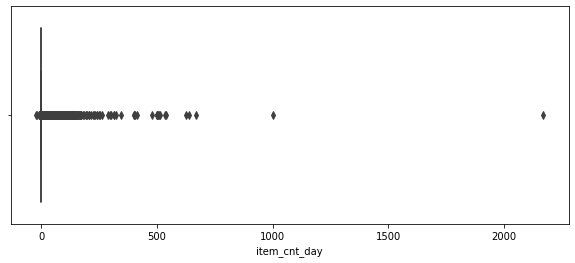

In [53]:
plt.figure(figsize=(10,4))
sns.boxplot(x=df_train.item_cnt_day)
for i in range(90,101):
  print("{}th percenile value of item count: {}".format(i,np.percentile(df_train.item_cnt_day.values,i)))
outlier_item_cnt = np.percentile(df_train.item_cnt_day.values,100) 

99% of training records has less 5 or less item count

Only 1% of training records has more than 5 item count

90th percenile value of item price: 1999.0
91th percenile value of item price: 2090.0
92th percenile value of item price: 2299.0
93th percenile value of item price: 2499.0
94th percenile value of item price: 2599.0
95th percenile value of item price: 2690.0
96th percenile value of item price: 2999.0
97th percenile value of item price: 3190.0
98th percenile value of item price: 3590.0
99th percenile value of item price: 5999.0
100th percenile value of item price: 307980.0


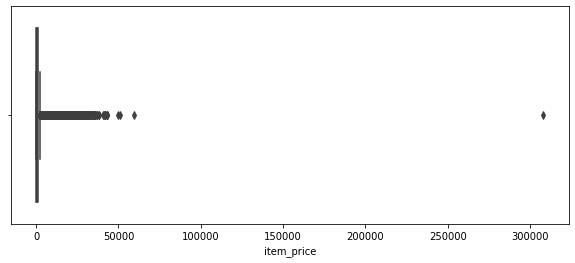

In [84]:
plt.figure(figsize=(10,4))
sns.boxplot(x=df_train.item_price)
for i in range(90,101):
  print("{}th percenile value of item price: {}".format(i,np.percentile(df_train.item_price.values,i)))
outlier_item_price = np.percentile(df_train.item_price.values,100) 

99% of traning records has 5999 or less item price

Only 1% of training records has more than 5999 item price

###Shop wise selling

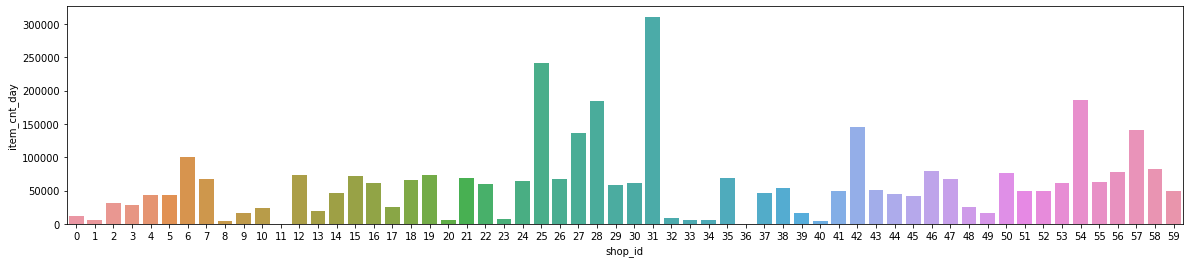

In [74]:
df_train_3 = df_train.groupby(['shop_id'], as_index=False)['item_cnt_day'].sum()
plt.figure(figsize=(20,4))
sns.barplot(x="shop_id",y="item_cnt_day", data=df_train_3)
plt.show()

### Item category wise selling

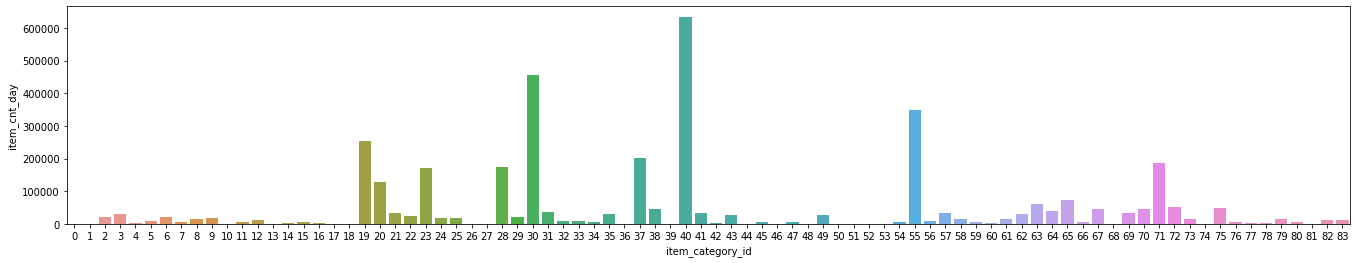

In [77]:
df_train_3 = df_train_2.groupby(['item_category_id'], as_index=False)['item_cnt_day'].sum()
plt.figure(figsize=(23,4))
sns.barplot(x="item_category_id",y="item_cnt_day", data = df_train_3)
plt.show()

### Month wise selling

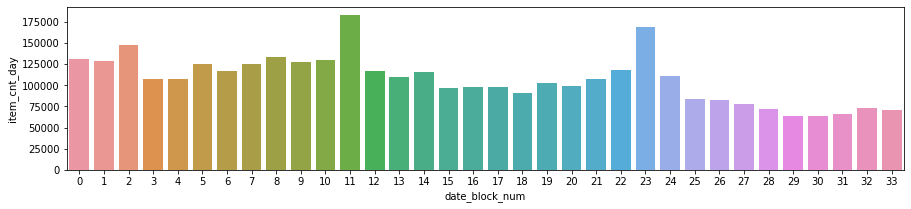

In [83]:
df_train_3 = df_train.groupby(['date_block_num'], as_index=False)['item_cnt_day'].sum()
plt.figure(figsize=(15,3))
sns.barplot(x="date_block_num",y="item_cnt_day", data = df_train_3)
plt.show()

# EDA on shop_id and item_id exist in test data

In [85]:
test_shop = df_test['shop_id'].unique()
test_item = df_test['item_id'].unique()
# Only shops that exist in test data
_train = df_train[df_train['shop_id'].isin(test_shop)]
# Only items that exist in test data
_train = _train[_train['item_id'].isin(test_item)]

In [89]:
print("shape after exluding unwanted shop and item ids ",_train.shape)

shape after exluding unwanted shop and item ids  (1224439, 6)


In [91]:
print("Number of Duplicates" ,len(_train[_train.duplicated()]))

Number of Duplicates 5


### Outlier Analysing

90th percenile value of item count: 2.0
91th percenile value of item count: 2.0
92th percenile value of item count: 2.0
93th percenile value of item count: 2.0
94th percenile value of item count: 2.0
95th percenile value of item count: 2.0
96th percenile value of item count: 3.0
97th percenile value of item count: 3.0
98th percenile value of item count: 4.0
99th percenile value of item count: 7.0
100th percenile value of item count: 2169.0


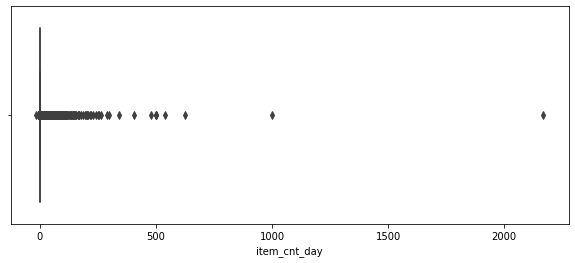

In [93]:
plt.figure(figsize=(10,4))
sns.boxplot(x=_train.item_cnt_day)
for i in range(90,101):
  print("{}th percenile value of item count: {}".format(i,np.percentile(_train.item_cnt_day.values,i)))
outlier_item_cnt = np.percentile(_train.item_cnt_day.values,100) 

99%  dataset has 7 or less sellings





90th percenile value of item price: 2499.0
91th percenile value of item price: 2599.0
92th percenile value of item price: 2599.0
93th percenile value of item price: 2599.0
94th percenile value of item price: 2799.0
95th percenile value of item price: 2999.0
96th percenile value of item price: 3190.0
97th percenile value of item price: 3490.0
98th percenile value of item price: 3790.0
99th percenile value of item price: 4990.0
100th percenile value of item price: 59200.0


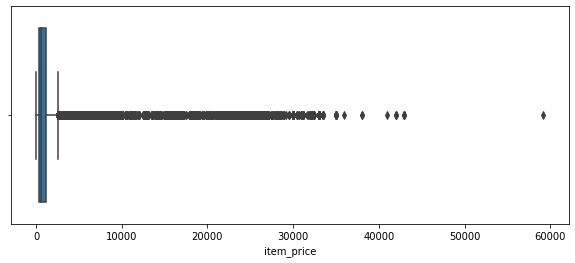

In [94]:
plt.figure(figsize=(10,4))
sns.boxplot(x=_train.item_price)
for i in range(90,101):
  print("{}th percenile value of item price: {}".format(i,np.percentile(_train.item_price.values,i)))
outlier_item_price = np.percentile(_train.item_price.values,100) 

99%  dataset has 4990 or less item price


### Shop wise selling

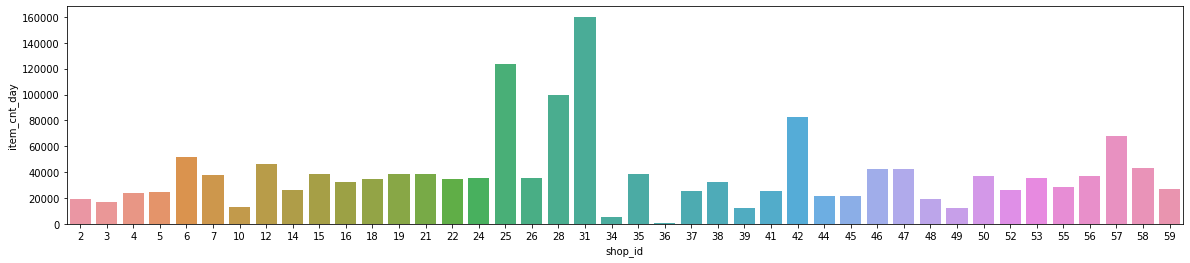

In [95]:
df_train_3 = _train.groupby(['shop_id'], as_index=False)['item_cnt_day'].sum()
plt.figure(figsize=(20,4))
sns.barplot(x="shop_id",y="item_cnt_day", data=df_train_3)
plt.show()

### catogery wise selling

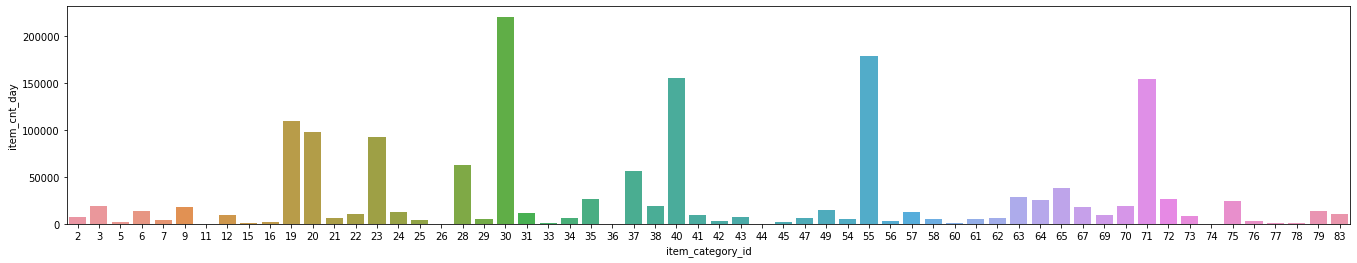

In [96]:
_train_2 = _train.merge(df_items, on='item_id', how='left' )
df_train_3 = _train_2.groupby(['item_category_id'], as_index=False)['item_cnt_day'].sum()
plt.figure(figsize=(23,4))
sns.barplot(x="item_category_id",y="item_cnt_day", data = df_train_3)
plt.show()

### Month wise selling

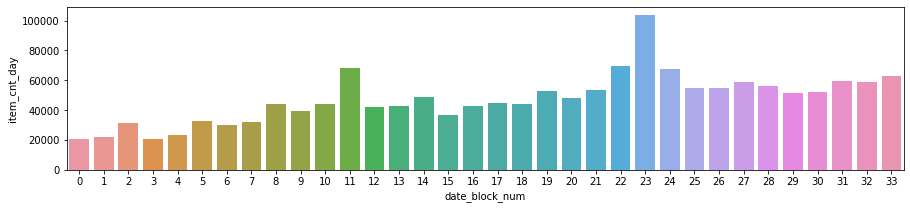

In [97]:
df_train_3 = _train.groupby(['date_block_num'], as_index=False)['item_cnt_day'].sum()
plt.figure(figsize=(15,3))
sns.barplot(x="date_block_num",y="item_cnt_day", data = df_train_3)
plt.show()